In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [7]:
df.shape

(1728, 7)

In [8]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [11]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [15]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
for col in col_names:
  print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [16]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [17]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [18]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [21]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [25]:
pip install category_encoders

In [26]:
import category_encoders as ce

In [27]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [28]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [29]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,3,3,1
1201,1,4,4,1,3,3
628,2,2,1,3,1,3
1498,3,2,1,1,3,3
1263,1,4,3,2,3,2


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [32]:
y_pred_gini = clf_gini.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7592


In [35]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [36]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7767


In [37]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7767
Test set score: 0.7592


[Text(0.625, 0.875, 'x[3] <= 2.5\ngini = 0.452\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(0.5, 0.625, 'x[5] <= 1.5\ngini = 0.571\nsamples = 816\nvalue = [266, 50, 459, 41]'),
 Text(0.25, 0.375, 'x[0] <= 3.5\ngini = 0.627\nsamples = 273\nvalue = [147, 21, 64, 41]'),
 Text(0.125, 0.125, 'gini = 0.615\nsamples = 203\nvalue = [114, 21, 27, 41]'),
 Text(0.375, 0.125, 'gini = 0.498\nsamples = 70\nvalue = [33, 0, 37, 0]'),
 Text(0.75, 0.375, 'x[5] <= 2.5\ngini = 0.42\nsamples = 543\nvalue = [119, 29, 395, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 274\nvalue = [0, 0, 274, 0]'),
 Text(0.875, 0.125, 'gini = 0.59\nsamples = 269\nvalue = [119, 29, 121, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]')]

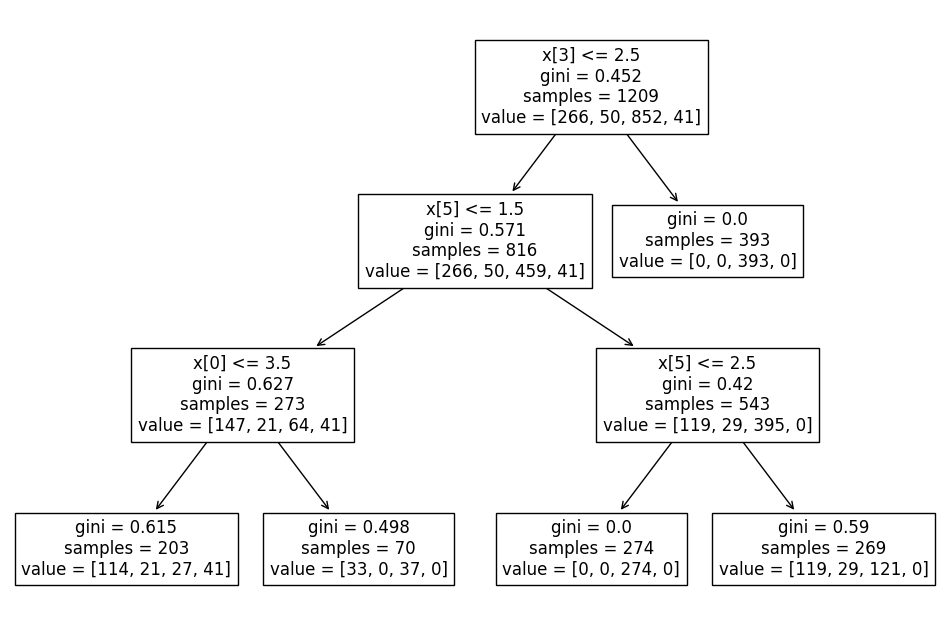

In [38]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

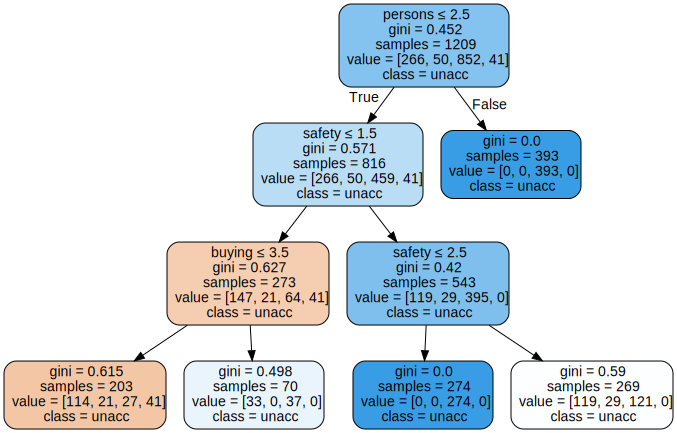

In [39]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [40]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [41]:
y_pred_en = clf_en.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7592


In [43]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [44]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7767


In [45]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7767
Test set score: 0.7592


[Text(0.625, 0.875, 'x[3] <= 2.5\nentropy = 1.192\nsamples = 1209\nvalue = [266, 50, 852, 41]'),
 Text(0.5, 0.625, 'x[5] <= 1.5\nentropy = 1.458\nsamples = 816\nvalue = [266, 50, 459, 41]'),
 Text(0.25, 0.375, 'x[0] <= 3.5\nentropy = 1.667\nsamples = 273\nvalue = [147, 21, 64, 41]'),
 Text(0.125, 0.125, 'entropy = 1.659\nsamples = 203\nvalue = [114, 21, 27, 41]'),
 Text(0.375, 0.125, 'entropy = 0.998\nsamples = 70\nvalue = [33, 0, 37, 0]'),
 Text(0.75, 0.375, 'x[5] <= 2.5\nentropy = 1.04\nsamples = 543\nvalue = [119, 29, 395, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 274\nvalue = [0, 0, 274, 0]'),
 Text(0.875, 0.125, 'entropy = 1.385\nsamples = 269\nvalue = [119, 29, 121, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 393\nvalue = [0, 0, 393, 0]')]

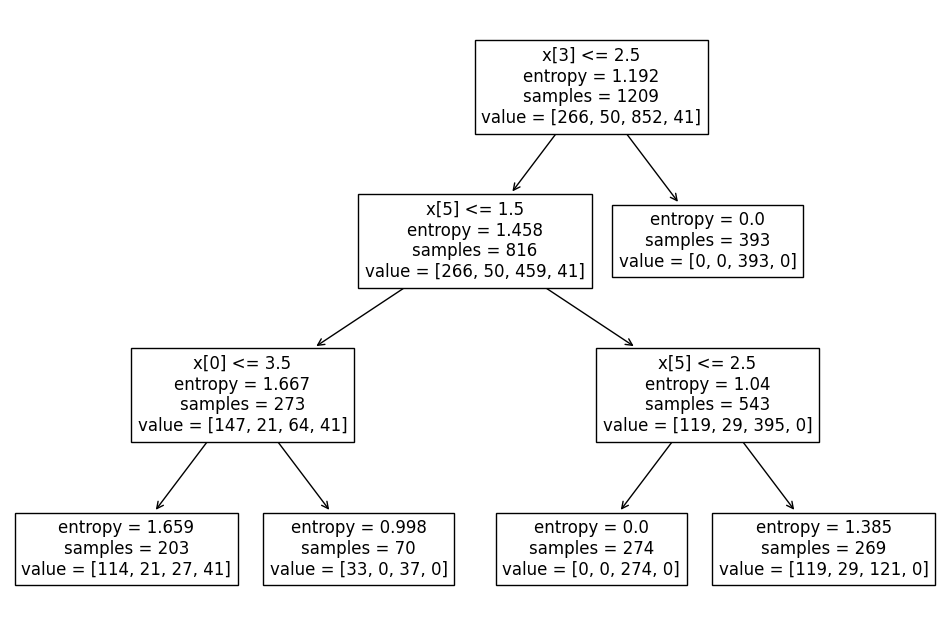

In [46]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

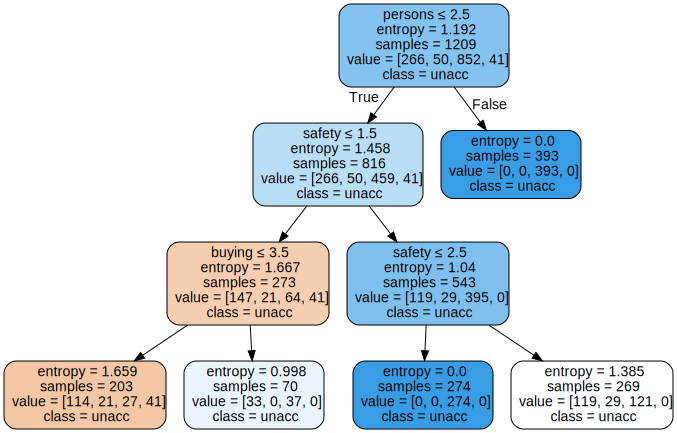

In [47]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=y_train,
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 44   0  74   0]
 [  9   0  10   0]
 [  8   0 350   0]
 [ 24   0   0   0]]


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.52      0.37      0.43       118
        good       0.00      0.00      0.00        19
       unacc       0.81      0.98      0.88       358
       vgood       0.00      0.00      0.00        24

    accuracy                           0.76       519
   macro avg       0.33      0.34      0.33       519
weighted avg       0.67      0.76      0.71       519

